In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('part1.csv')

In [14]:
df = pd.read_csv('part1.csv')
df = df.sort_values(by='collection_day')
df['collection_day'] = pd.to_datetime(df['collection_day'])
df['starts_at'] = pd.to_datetime(df['starts_at'])
df['completed_at'] = pd.to_datetime(df['completed_at'])

In [1]:
df['completed_at'].dt.total_seconds()

NameError: name 'df' is not defined

In [12]:
df.head()

,Unnamed: 0,department,product_name,quantity,category,package_type,not_found,store_id,stock,brand,collection_day,product_id,city,promotion_price,regular_price,completed_at,starts_at,order_identifier,shopper_login
2145959,2145959,КОСМЕТИКА,"1000Ш RIOB ТРУБ Д/КОКТ Д=0,5СМ",1,ОДНОРАЗОВЫЕ ПРИНАДЛЕЖНОСТИ,ШТУКА,0,21,19.0,RIOBA,2017-01-09 00:00:00,8860.0,1,NaN,299.222,2017-01-09 13:19:00,2017-01-09 20:00:00,338801,NaN
541818,541818,ДЕЛИКАТЕСЫ И СЫР,300Г КОРЕЙ/АССОРТ НАБ№4 ДАНЕС,0,ОХЛАЖДЕННЫЕ ГОТОВЫЕ БЛЮДА,ШТУКА,1,3,5.0,ДАНЕССИЯ,2017-01-09 00:00:00,84082.0,1,NaN,86.273,2017-01-09 17:23:00,2017-01-09 21:00:00,337962,NaN
541815,541815,ДЕЛИКАТЕСЫ И СЫР,300Г КОРЕЙ/АССОРТ НАБ№2 ДАНЕС,1,ОХЛАЖДЕННЫЕ ГОТОВЫЕ БЛЮДА,ШТУКА,0,3,7.0,ДАНЕССИЯ,2017-01-09 00:00:00,84081.0,1,NaN,95.426,2017-01-09 17:23:00,2017-01-09 21:00:00,337962,NaN
541808,541808,ДЕЛИКАТЕСЫ И СЫР,400ГСАЛАТ СПАРЖА ПО-КОРЕЙСКИ,1,ОХЛАЖДЕННЫЕ ГОТОВЫЕ БЛЮДА,ШТУКА,1,12,31.0,FRESH SECRET,2017-01-09 00:00:00,6847.0,1,NaN,112.211,2017-01-09 12:17:00,2017-01-09 16:00:00,338722,NaN
541807,541807,ДЕЛИКАТЕСЫ И СЫР,600Г САЛАТ БАКЛАЖАНЫ ПО-КОРЕЙС,1,ОХЛАЖДЕННЫЕ ГОТОВЫЕ БЛЮДА,ШТУКА,0,12,5.0,FRESH SECRET,2017-01-09 00:00:00,20085.0,1,NaN,128.987,2017-01-09 12:17:00,2017-01-09 16:00:00,338722,NaN


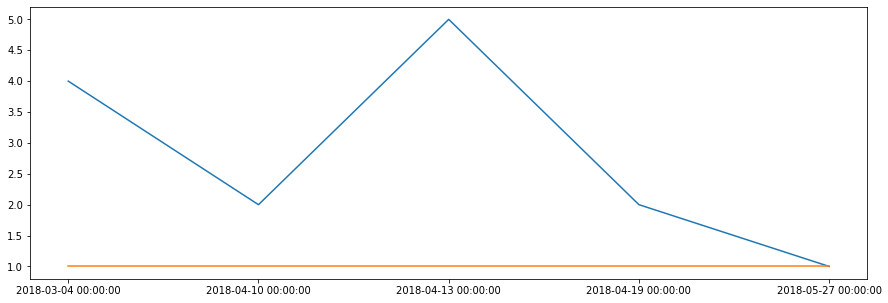

In [21]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(df[df['product_id']==4592903.0]['collection_day'],df[df['product_id']==4592903.0]['stock'])

ax.plot(df[df['product_id']==4592903.0]['collection_day'],df[df['product_id']==4592903.0]['quantity'])

<IPython.core.display.Javascript object>


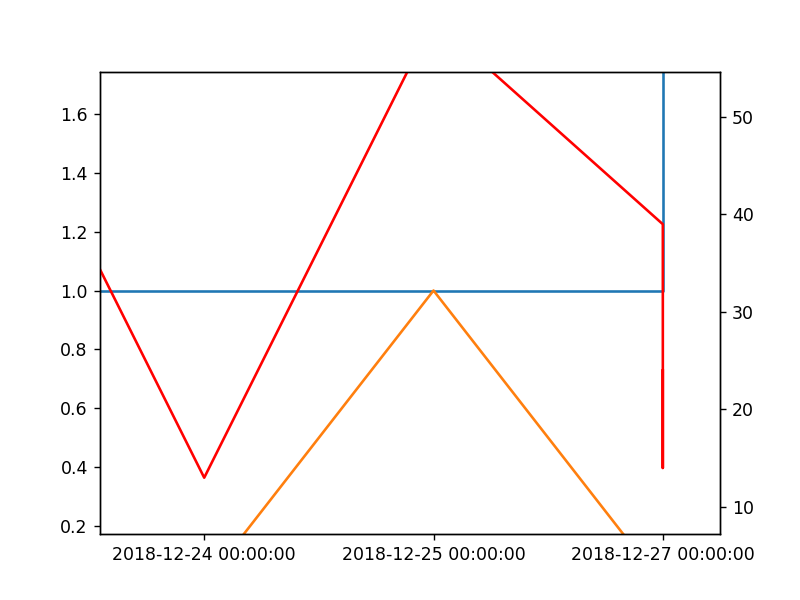

In [34]:
fig,ax = plt.subplots(1,1)
# ax.plot(df[df['product_id']==8860.0]['collection_day'],df[df['product_id']==8860.0]['stock'])

ax.plot(df[df['product_id']==8860.0]['collection_day'],df[df['product_id']==8860.0]['quantity'])

ax.plot(df[df['product_id']==8860.0]['collection_day'],df[df['product_id']==8860.0]['not_found'])
# %matplotlib notebook
ax = ax.twinx()

ax.plot(df[df['product_id']==8860.0]['collection_day'],df[df['product_id']==8860.0]['stock'],color="r")
plt.show()

In [36]:
df[df['product_id']==8860.0]['collection_day'].size

258

In [39]:
df['collection_day'] = pd.to_datetime(df['collection_day'])

In [42]:
df['collection_day'].iloc[2145959].weekday()

2

In [51]:
len(df['promotion_price'])

4000000

In [50]:
df['promotion_price'].isna().sum()

2450103

In [6]:
def create_time_features(df,time_column='date', label=None):
    """
    Creates time series features from datetime index
    """
#     df['date'] = df['completed_at']
    if time_column == 'starts_at':
        df[time_column]=df[time_column]-pd.Timedelta(hours=3)
    df[time_column+'_hour'] = df[time_column].dt.hour
    df[time_column+'_dayofweek'] = df[time_column].dt.dayofweek
    df[time_column+'_quarter'] = df[time_column].dt.quarter
    df[time_column+'_month'] = df[time_column].dt.month
    df[time_column+'_year'] = df[time_column].dt.year
    df[time_column+'_dayofyear'] = df[time_column].dt.dayofyear
    df[time_column+'_dayofmonth'] = df[time_column].dt.day
    df[time_column+'_weekofyear'] = df[time_column].dt.weekofyear
    
#     X = df[['hour','dayofweek','quarter','month','year',
#            'dayofyear','dayofmonth','weekofyear']]
    X = df
    if label:
        y = df[label]
        return X, y
    return X

In [7]:
df = pd.read_csv('part1.csv')
df = df.sort_values(by='collection_day')

df = df.drop(columns=['Unnamed: 0','product_name'])
df['collection_day'] = pd.to_datetime(df['collection_day'])
df['starts_at'] = pd.to_datetime(df['starts_at'])
df['completed_at'] = pd.to_datetime(df['completed_at'])

df = create_time_features(df, time_column='collection_day')
df = create_time_features(df, time_column='starts_at')
df = create_time_features(df, time_column='completed_at')

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import numpy as np


In [12]:
# Функция для LabelEncoding столбцов со строковыми значениями
def label_encode_customer(df, columns_to_encode):
#     columns_to_encode = [f'product_{i}' for i in range(7)] + ['marital_status_cd', 'job_title']
    for col in columns_to_encode:
        df[col].fillna('nan', inplace=True)
        df[col] = LabelEncoder().fit_transform(df[col])
    return df

In [ ]:
# Функция, в которой мы заполняем NaNы в некоторых столбцах медианой
def fill_nans_customer(cust, columns_to_fill):
#     columns_to_fill = ['age', 'first_session_year', 'first_session_month',
#                        'first_session_day', 'first_session_hour']
    for col in columns_to_fill:
        cust[col].fillna(cust[col].median(), inplace=True)
    cust['promotion_price'].fillna(-1, inplace=True)
    cust['shopper_login'].fillna(-1, inplace=True)
    return cust

In [39]:
df.head()

,department,quantity,category,package_type,not_found,store_id,stock,brand,collection_day,product_id,...,starts_at_dayofmonth,starts_at_weekofyear,completed_at_hour,completed_at_dayofweek,completed_at_quarter,completed_at_month,completed_at_year,completed_at_dayofyear,completed_at_dayofmonth,completed_at_weekofyear
2145959,КОСМЕТИКА,1,ОДНОРАЗОВЫЕ ПРИНАДЛЕЖНОСТИ,ШТУКА,0,21,19.0,RIOBA,2017-01-09,8860.0,...,9,2,13,0,1,1,2017,9,9,2
541818,ДЕЛИКАТЕСЫ И СЫР,0,ОХЛАЖДЕННЫЕ ГОТОВЫЕ БЛЮДА,ШТУКА,1,3,5.0,ДАНЕССИЯ,2017-01-09,84082.0,...,9,2,17,0,1,1,2017,9,9,2
541815,ДЕЛИКАТЕСЫ И СЫР,1,ОХЛАЖДЕННЫЕ ГОТОВЫЕ БЛЮДА,ШТУКА,0,3,7.0,ДАНЕССИЯ,2017-01-09,84081.0,...,9,2,17,0,1,1,2017,9,9,2
541808,ДЕЛИКАТЕСЫ И СЫР,1,ОХЛАЖДЕННЫЕ ГОТОВЫЕ БЛЮДА,ШТУКА,1,12,31.0,FRESH SECRET,2017-01-09,6847.0,...,9,2,12,0,1,1,2017,9,9,2
541807,ДЕЛИКАТЕСЫ И СЫР,1,ОХЛАЖДЕННЫЕ ГОТОВЫЕ БЛЮДА,ШТУКА,0,12,5.0,FRESH SECRET,2017-01-09,20085.0,...,9,2,12,0,1,1,2017,9,9,2


In [40]:
df.columns

Index(['department', 'quantity', 'category', 'package_type', 'not_found',
       'store_id', 'stock', 'brand', 'collection_day', 'product_id', 'city',
       'promotion_price', 'regular_price', 'completed_at', 'starts_at',
       'order_identifier', 'shopper_login', 'collection_day_hour',
       'collection_day_dayofweek', 'collection_day_quarter',
       'collection_day_month', 'collection_day_year',
       'collection_day_dayofyear', 'collection_day_dayofmonth',
       'collection_day_weekofyear', 'starts_at_hour', 'starts_at_dayofweek',
       'starts_at_quarter', 'starts_at_month', 'starts_at_year',
       'starts_at_dayofyear', 'starts_at_dayofmonth', 'starts_at_weekofyear',
       'completed_at_hour', 'completed_at_dayofweek', 'completed_at_quarter',
       'completed_at_month', 'completed_at_year', 'completed_at_dayofyear',
       'completed_at_dayofmonth', 'completed_at_weekofyear'],
      dtype='object')

In [11]:
categories = ['department','category','package_type','brand']

In [13]:
counts = ['quantity','stock','regular_price','promotion_price']

In [15]:
ids = ['store_id','product_id','shopper_login']

In [16]:
df.values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000000 entries, 2145959 to 2584093
Data columns (total 41 columns):
department                   object
quantity                     int64
category                     object
package_type                 object
not_found                    int64
store_id                     int64
stock                        float64
brand                        object
collection_day               datetime64[ns]
product_id                   float64
city                         int64
promotion_price              float64
regular_price                float64
completed_at                 datetime64[ns]
starts_at                    datetime64[ns]
order_identifier             int64
shopper_login                object
collection_day_hour          int64
collection_day_dayofweek     int64
collection_day_quarter       int64
collection_day_month         int64
collection_day_year          int64
collection_day_dayofyear     int64
collection_day_dayofmonth    int64
c